In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [91]:
df = pd.read_csv('energy_data.csv')
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [92]:
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

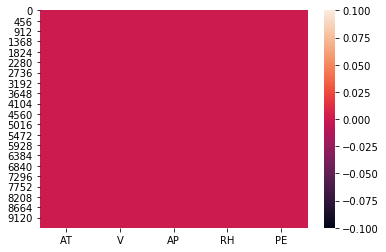

In [93]:
# Checking For Null Values Using heatmap
sns.heatmap(df.isnull())

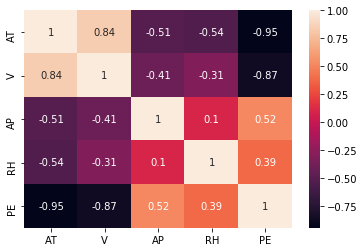

In [94]:
#Checking Correlation
sns.heatmap(df.corr(), annot = True)

In [95]:
#Checking For Data-Types
df.dtypes

AT    float64
V     float64
AP    float64
RH    float64
PE    float64
dtype: object

In [96]:
# Scale / Standardize the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [112]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]
print(X.shape, Y.shape)

(9568, 4) (9568,)


In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

X_train = np.c_[np.ones(len(X_train),dtype="int64"),X_train]
X_test = np.c_[np.ones(len(X_test),dtype="int64"),X_test]

# Defing Cost Function
We will be using MSE as cost fucntion

In [132]:
def compute_cost(X, Y, theta):
    m = len(Y)
    cost = (np.sum( X.dot(theta) -  Y) ** 2 ) / (2 * m)
    return cost

In [133]:
#Batch Gradient Descent
def gradient_descent(X, Y, theta, alpha, iterations):
    costs = [0] * iterations
    m = len(X)
    for i in range(iterations):
        # Hypothesis Value
        Y_pred = X.dot(theta)
        # Calculating Loss b/w
        loss = (Y_pred - Y)
        gradient = X.T.dot(loss) / m
        theta = theta - alpha * gradient
        cost = compute_cost(X, Y, theta)
        costs.append(cost)
#         if(i%100 == 0):
#             print("Iteration: {}, Cost: {}".format(i, cost))
    return theta, costs

In [139]:
#Initializing Coefficients
theta = np.zeros((X_train.shape[1]))
alpha = 0.005
iterations = 200

theta_new, costs = gradient_descent(X_train, Y_train, theta, alpha, iterations)
print(theta_new)

/home/legion/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/home/legion/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in subtract
  # This is added back by InteractiveShellApp.init_path()


[nan nan nan nan nan]


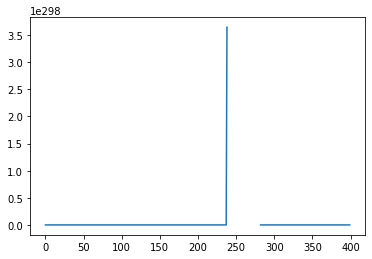

In [140]:
plt.plot(costs)
plt.show()